# An Introduction to Python and Fitting a Model to Data

If you want to save a personal copy of this notebook, you can go to the File menu and then "Save a copy in Drive".

Here we "import" various code modules that we need to do things.  A programming language like Python has many capabilities but they are not all loaded into memory when we start the Python interpreter.  We use the ```import``` statement to load the functions that we'll need.

In [ ]:
from numpy import array, sqrt
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Data and a Plot

Enter the data.  We're using the ```array``` type array type to store these data because it means we can do math operations on the entire array with the same code expression as if we were doing them on a single number.  The data were copied over from Table 1 of [Hubble (1929)](https://www.pnas.org/content/15/3/168).

In [ ]:
distances = array([ 0.032, 0.034, 0.214, 0.263, 0.275, 0.275, 0.45 , 0.5  ,
       0.5  , 0.63 , 0.8  , 0.9  , 0.9  , 0.9  , 0.9  , 1.   , 1.1  ,
       1.1  , 1.4  , 1.7  , 2.   , 2.   , 2.   , 2.   ])

velocities = array([ 170.,  290., -130.,  -70., -185., -220.,  200.,  290.,
        270.,  200.,  300.,  -30.,  650.,  150.,  500.,  920.,  450.,
        500.,  500.,  960.,  500.,  850.,  800., 1090.])

In [ ]:
velocities/distances

Make a basic scatter plot to see that the data looks as we expect it to.  Here is Hubble's original graph for reference.  As we look at this figure, we should note that Hubble plotted the individual data points as filled circles and the averages in a few distance bins as open circles.  Here we deal only with the individual data points.

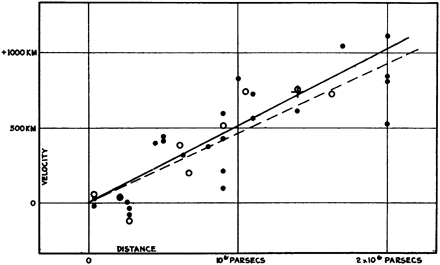

The code below creates a basic figure, and makes a scatter plot for the data.  We set the x- and y-limits to be similar to Hubbles plot.  We also label the axes, turn on gridlines, and include a legend.

In [ ]:
plt.figure(1,figsize=(10,7))
plt.scatter(distances, velocities, marker='o', color='Tomato', s=100, label='Hubble (1929)')
plt.grid()
plt.ylim(-500,1500)
plt.xlim(-0.5,2.5)
plt.xlabel('Distance (Mpc)')
plt.ylabel('Velocity (km/s)')
plt.legend(loc='upper left');

## Defining and Using a Function

Now that we have a basic plot, let's consider how we can go about fitting a model to these data.  First, we take a basic look at how we define functions in Python.  Functions are defined using the keyword ```def```.  The basic equation for a line is y = f(x) = mx + b; here m is the slope of the line and b is the intercept (where the line crosses the x-axis).  So a general function for a linear model would look like this:



In [ ]:
def f(x,m,b): return m*x + b

Let's pull this apart: the ```def``` keyword tells Python we're defining a function.  We call the function ```f``` and it has arguments ```x, m, b```.  We do it in this order for a reason, which we'll explain later.  The ```:``` tells Python we're beginning to enter the code for the function and the ```return``` statement tells it what value it should return when we call the function.  We could do it another way, which is more useful when there is more code involved in defining the function:

In [ ]:
def f(x,m,b):
  y = m*x + b
  return y

These two definitions give the same results.  The latter is more general and uses a local variable, ```y```, to store the result of our calculation.  This ```y``` only exists inside the function and Python forgets all about it once it returns from the function call.  Let's call the function with some numbers and see what happens.

In [ ]:
x = 1.0 #Mpc
m = 70 #km/s
b = 0 # no intercept
f(x,m,b)

In the above cell we've introduced three new variables, corresponding to the arguments of the function, and then called the function.  The output, ```70.0``` is the value that is returned by the function.  We can also assign a new variable to the output of the function.  Note also that we can re-use variables as we please.  The variable will hold the last value we assigned to it.

In [ ]:
x = 1.0 #Mpc
m = 70 #km/s
b = 0 # no intercept
y=f(x,m,b)
y

We can also feed an array of numbers to our function.  Let's try that with the ```distances``` array that we created above.

In [ ]:
y=f(distances,m,b)
y

Here we've applied the function, a linear "model" in this case, to the distances array and the return value, stored in ```y```, is now an array.

Let's make another plot where we again show the data and this time also plot a linear relationship between distance and velocity.  Just by visual inspection, the slope of Hubble's data look like about 500 km/s.  So we'll set the slope equal to 500.  And we'll set the intercept to zero because we would expect the local velocity to be zero, not some other value.

In [ ]:
m = 500
b = 0
v = f(distances, m, b)

plt.figure(2,figsize=(10,7))
plt.scatter(distances, velocities, marker='o', color='Tomato', s=100, label='Hubble (1929)')
plt.plot(distances, v, color='DodgerBlue', label='linear')
plt.grid()
plt.ylim(-500,1500)
plt.xlim(-0.5,2.5)
plt.xlabel('Distance (Mpc)')
plt.ylabel('Velocity (km/s)')
plt.legend(loc='upper left');

## Fitting a Model to Data

This looks quite reasonable but we can use statistical techniques to find the slope and intercept that best fits these data, as well as a measure of the uncertainties in the those fitted parameters.

You can get more information about a function in iPython by typing the name of the function either followed or preceded by a ?. 

In [ ]:
?curve_fit

```curve_fit``` is a very sophisticated function that allows us to determine the parameters of our model (linear in this case).  The details of exactly how it works are beyond the scope of this activity.  But let's look more closely at the arguments this function takes: 


*   ```f``` is the name of the function we want to fit to the data
*   ```xdata``` is the independent variable (x-axis)
*   ```ydata``` is the dependent variable (y-axis)
*   ```p0``` (optional) is an initial guess for the parameters of our function (m,b)
*   ```sigma``` (optional) is a way to set the uncertainty in the data

Other arguments we will not use.  The only ones we need to give it are f, xdata, and ydata.

```curve_fit``` returns (gives back to us) the optimized values ```popt``` of the parameters (m,b) and the covariance of those parameters ```pcov```.  We'll discuss what that means.  Let's try it out!

In [ ]:
popt, pcov = curve_fit(f, distances, velocities)
print('best-fit value of slope is {0:6.2f} km/s and the intercept is {1:6.2f} km/s.'.format(popt[0],popt[1]))

In [ ]:
popt

In [ ]:
pcov

```popt``` is an array of length 2.  The two components are the best-fit values of the two parameters of our function.

```popt``` tells us that the best-fit value of the slope, Hubble's constant, is 454. km/s.  It also finds the best-fit intercept to be -41 km/s. 

The 1-$\sigma$ uncertainty on the slope is ```sqrt(pcov[0,0])``` and on the intercept is ```sqrt(pcov[1,1])```.

In [ ]:
print('uncertainty on slope = {0:6.2f} km/s'.format(sqrt(pcov[0,0])))
print('uncertainty on intercept = {0:6.2f} km/s'.format(sqrt(pcov[1,1])))

Let's make a plot of our best-fit linear model to the data.

In [ ]:
m = popt[0]
b = popt[1]
fit_velocities = f(distances, m, b)
plt.figure(2,figsize=(10,7))
plt.scatter(distances, velocities, marker='o', color='Tomato', s=100, label='Hubble (1929)')
plt.plot(distances, fit_velocities, color='DodgerBlue', label='linear best-fit')
plt.grid()
plt.ylim(-500,1500)
plt.xlim(-0.5,2.5)
plt.xlabel('Distance (Mpc)')
plt.ylabel('Velocity (km/s)')
plt.legend(loc='upper left');

## Refining the Model

Now, the simplest assumption is that the expansion velocity at D=0 (local) should be zero.  This is equivalent to a linear function with an intercept (b) equatl to zero.  Let's define a new function, ```g```, that reflects this.  Now the only parameter that the function takes is the slope.

In [ ]:
def g(x,m):
  y = m*x
  return y

Let's find the best-fit value of the slope for this function and then plot it, too.

In [ ]:
popt, pcov = curve_fit(g, distances, velocities)
print('best-fit value of slope is {0:6.2f} km/s.'.format(popt[0]))
print('uncertainty on slope = {0:6.2f} km/s'.format(sqrt(pcov[0,0])))

In [ ]:
m = popt[0]
g_fit_velocities = g(distances, m)
plt.figure(3,figsize=(10,7))
plt.scatter(distances, velocities, marker='o', color='Tomato', s=100, label='Hubble (1929)')
plt.plot(distances, g_fit_velocities, color='DodgerBlue', label='linear g best-fit')
plt.grid()
plt.ylim(-500,1500)
plt.xlim(-0.5,2.5)
plt.xlabel('Distance (Mpc)')
plt.ylabel('Velocity (km/s)')
plt.legend(loc='upper left');

# Next Steps

Now, let's try a more recent data set.  These data are from [Riess, Press, & Kirshner (1996)](https://ui.adsabs.harvard.edu/abs/1996ApJ...473...88R/abstract). But notice that these data are not in the same units we used above.  The velocites are log10([km/s]) and the distances are expressed as the distance modulus ($\mu = m-M$).  It's up to you how you want to work with these but the challenge is again to estimate the Hubble constant and its uncertainty from the data points. This [web page]( https://astronomy.swin.edu.au/cosmos/D/Distance+Modulus ) gives a good explanation ofthe relationship between the distance modulus and distance. 

In [ ]:
logV = array([ 3.734, 3.779, 3.521, 4.481, 4.35 , 3.896, 4.14 , 3.991,
       3.613, 4.178, 3.299, 3.389, 3.709, 3.859, 3.685, 4.03 , 3.938,
       4.17 , 3.938, 4.17 , 3.398, 3.547])
mu = array([ 34.59, 34.75, 33.53, 38.27, 37.79, 34.5 , 36.75, 35.7 ,
       34.15, 36.87, 32.22, 32.96, 34.52, 35.32, 34.24, 36.16, 35.86,
       36.93, 35.86, 36.93, 32.76, 33.76])